# Abdelrahman Ahmed Ragab           G1_Smart

# Quiz 1 :
    
    Q1) Batch GD when using all data every iteration with number of epoch iterations
        Mini Batch GD when using part of data every iteration with number of epoch iterations
        Stochastic GD when using one record data every iteration with number of epoch iterations
    
    Q2) False
    
    Q3) B
    
    Q4) A
    
    Q5) B
    

# Quiz 2 :
    
    Q1) A & C
    
    Q2) True
    

# Quiz 3 :
    
    Q1) True
    
    Q2) B
    
    Q3) C
    
    Q4) A
    
    Q5) A

## Implementation

## Batch GD

In [1]:
import numpy as np
import matplotlib.pyplot as plt


x_points = np.array([1,1,2,3,4,5,6,7,8,9,10,11])
y_points = np.array([1,2,3,1,4,5,6,4,7,10,15,9])
feture = np.concatenate((np.ones(len(x_points)).reshape( len(x_points), 1) 
                         , x_points.reshape(len(x_points) , 1))  , axis = 1)
# print(feture)
theta = np.array([0 , 0 ])

Y= np.dot(theta ,feture.T)
# print(Y)
alpha = 0.001
Epoch = len(x_points)

# Hypotysis  Function : theta_0* X1 + theta_1 *x2

In [2]:
thetazero = []
thetaone = []
for i in range(Epoch):
    Y= np.dot(theta ,feture.T)
    theta = theta - alpha*(np.sum(np.dot( (Y-y_points) , feture) ,axis = 0)/Epoch)
    thetazero.append(theta[0])
    thetaone.append(theta[1])

## Visualising Theta Parameters on the DataSet

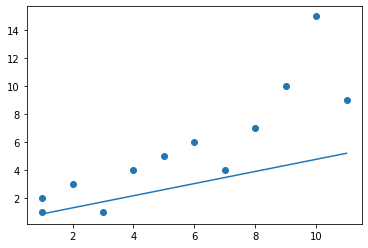

In [3]:
plt.scatter(x_points , y_points)
plt.plot(x_points, theta[0]+ x_points * theta[1]) 
plt.show()

## Visualising Thetas VS Iterations

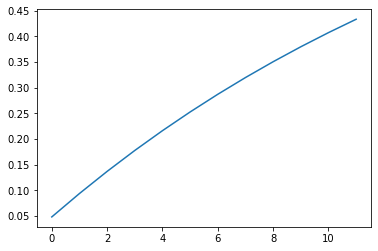

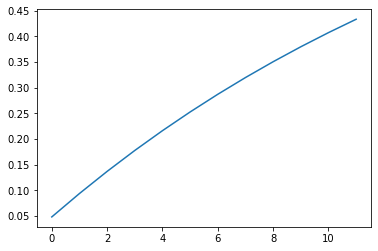

In [4]:
plt.plot(np.arange(len(thetazero)) , thetazero)
plt.show()
plt.plot(np.arange(len(thetaone)) , thetaone) 
plt.show()

# Using This time Cost Function (Every time I was ignore it becouse I update thetas directly and I depend on number of iteration)

In [5]:
theta_last = np.array([0 , 0])
while theta[0] - theta_last[0] > 0.001 and theta[1] - theta_last[1] > 0.001:
    theta_last =theta
    Y= np.dot(theta ,feture.T)
    theta = theta - alpha*(np.sum(np.dot( (Y-y_points) , feture) ,axis = 0)/Epoch)
    
print(theta)    

[0.86998705 0.86998705]


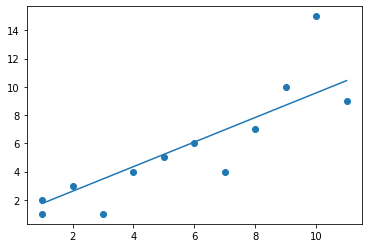

In [6]:
plt.scatter(x_points , y_points)
plt.plot(x_points, theta[0]+ x_points * theta[1]) 
plt.show()

## Mini-Batch GD

In [7]:
thetazero = []
thetaone = []
M = 0
for j in range(Epoch):
    for i in range(Epoch):
        if M <= Epoch:
            Y= np.dot(theta ,feture[M : M+4].T)
            theta = theta - alpha*(np.sum(np.dot( (Y-y_points[M : M+4]) , feture[M : M+4]) ,axis = 0)/Epoch)
            M += 4
            thetazero.append(theta[0])
            thetaone.append(theta[1])       
print(theta)    

[0.87102142 0.87102142]


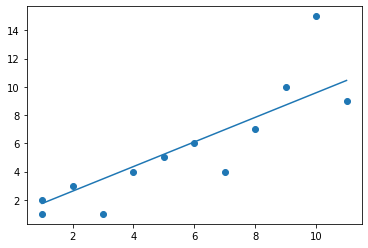

In [8]:
plt.scatter(x_points , y_points)
plt.plot(x_points, theta[0]+ x_points * theta[1]) 
plt.show()

## Visualising Thetas VS Iterations

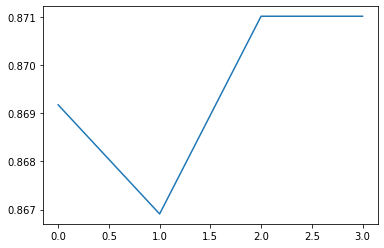

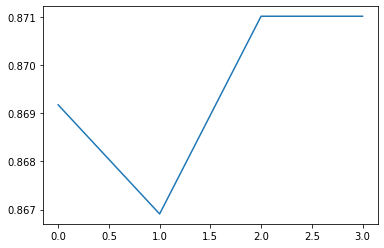

In [9]:
plt.plot(np.arange(len(thetazero)) , thetazero)
plt.show()
plt.plot(np.arange(len(thetaone)) , thetaone) 
plt.show()

## Stochastic GD

In [10]:
M = 0
for j in range(Epoch):
    for i in range(Epoch):
        if M <= Epoch:
            Y= np.dot(theta ,feture[M : M+1].T)
            theta = theta - alpha*(np.sum(np.dot( (Y-y_points[M : M+1]) , feture[M : M+1]) ,axis = 0)/Epoch)
            M += 4
    
print(theta)  

[0.87012248 0.87012248]


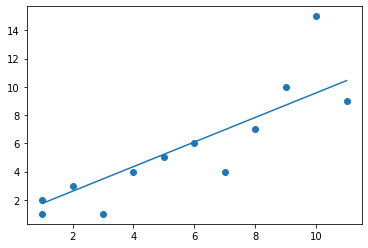

In [11]:
plt.scatter(x_points , y_points)
plt.plot(x_points, theta[0]+ x_points * theta[1]) 
plt.show()

# Batch Momentum based

In [12]:
Gamma = 0.09
Vt = 0
for i in range(Epoch):
    Y= np.dot(theta ,feture.T)
    Vt = Gamma*Vt + alpha*(np.sum(np.dot( (Y-y_points) , feture) ,axis = 0)/Epoch)
    theta = theta - Vt
print(theta)    

[0.87876268 0.87876268]


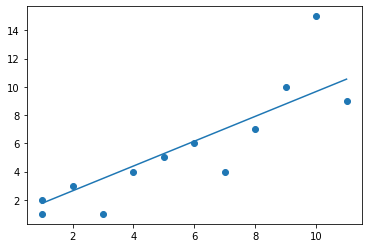

In [13]:
plt.scatter(x_points , y_points)
plt.plot(x_points, theta[0]+ x_points * theta[1]) 
plt.show()

# NAG Algorithm (Batch Momentum based Improving)

In [14]:
Gamma = 0.09
Vt = 0
Theta_Tmp = 0
for i in range(Epoch):
    Y= np.dot(theta ,feture.T)
    Theta_Tmp = theta - Gamma*Vt
    theta = theta - alpha*(np.sum(np.dot( (Y-y_points) , feture) ,axis = 0)/Epoch)
    Vt = Gamma*Vt + alpha*(np.sum(np.dot( (Y-y_points) , feture) ,axis = 0)/Epoch)
    
print(theta)   

[0.88263294 0.88263294]


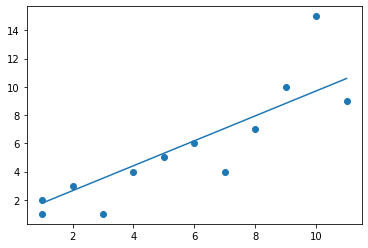

In [15]:
plt.scatter(x_points , y_points)
plt.plot(x_points, theta[0]+ x_points * theta[1]) 
plt.show()

# Adagrad Algorithm

In [16]:
Vt = 0
epslon = 1e-8
for i in range(Epoch):
    Y= np.dot(theta ,feture.T)
    Vt = Vt + ((np.sum(np.dot( (Y-y_points) , feture) ,axis = 0)/Epoch))**2
    theta = theta - (alpha/np.sqrt(Vt*epslon))*(np.sum(np.dot( (Y-y_points) , feture) ,axis = 0)/Epoch)
    
    
print(theta)   

[0.88667688 0.88667688]


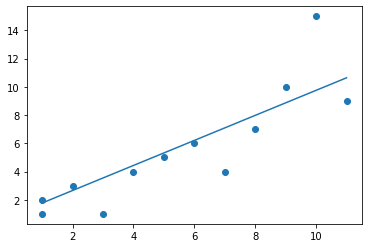

In [17]:
plt.scatter(x_points , y_points)
plt.plot(x_points, theta[0]+ x_points * theta[1]) 
plt.show()

# RMSProp Algorithm

In [18]:
Vt = 0
epslon = 1e-8
Beta = 0.7
for i in range(Epoch):
    Y= np.dot(theta ,feture.T)
    Vt = Beta*Vt + (1-Beta)*((np.sum(np.dot( (Y-y_points) , feture) ,axis = 0)/Epoch))**2
    theta = theta - (alpha/np.sqrt(Vt*epslon))*(np.sum(np.dot( (Y-y_points) , feture) ,axis = 0)/Epoch)
    
    
print(theta) 

[0.88667688 0.88667688]


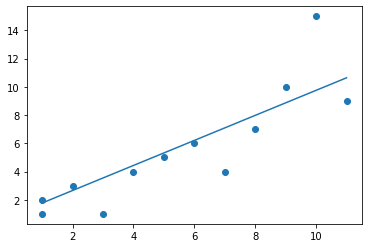

In [19]:
plt.scatter(x_points , y_points)
plt.plot(x_points, theta[0]+ x_points * theta[1]) 
plt.show()

# Adam Algorithm

In [20]:
Mt = 0
Vt = 0
Mt_hat = 0
Vt_hat = 0
epslon = 1e-8
Beta_1 = 0.2
Beta_2 = 0.9
for i in range(Epoch):
    Y= np.dot(theta ,feture.T)
    Mt = Beta_1*Mt + (1-Beta_1)*(np.sum(np.dot( (Y-y_points) , feture) ,axis = 0)/Epoch)
    Vt = Beta_2*Vt + (1-Beta_2)*((np.sum(np.dot( (Y-y_points) , feture) ,axis = 0)/Epoch))**2
    Mt_hat = Mt/(1-Beta_1)
    Vt_hat = Vt/(1-Beta_2)
    theta = theta - (alpha/np.sqrt(Vt_hat*epslon))*Mt_hat
    
    
print(theta) 

[0.88879312 0.88879312]


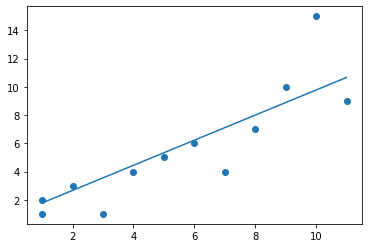

In [21]:
plt.scatter(x_points , y_points)
plt.plot(x_points, theta[0]+ x_points * theta[1]) 
plt.show()

# BAD using of adam 

In [22]:
Mt = 0
Vt = 0
Mt_hat = 0
Vt_hat = 0
epslon = 1e-8
Beta_1 = 0.2
Beta_2 = 0.7
thetazero = []
thetaone = []

for i in range(Epoch):
    Y= np.dot(theta ,feture.T)
    Mt = Beta_1*Mt + (1-Beta_1)*(np.sum(np.dot( (Y-y_points) , feture) ,axis = 0)/Epoch)
    Vt = Beta_2*Vt + (1-Beta_2)*((np.sum(np.dot( (Y-y_points) , feture) ,axis = 0)/Epoch))**2
    Mt_hat = Mt/(1-Beta_1)
    Vt_hat = Vt/(1-Beta_2)
    theta = theta - (alpha/np.sqrt(Vt_hat*epslon))*Mt_hat
    thetazero.append(theta[0])
    thetaone.append(theta[1])
    
print(theta) 

[5.1044597 5.1044597]


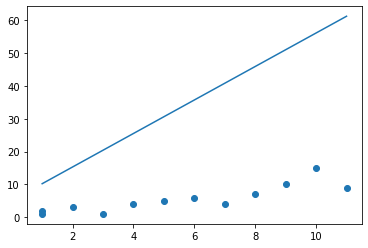

In [23]:
plt.scatter(x_points , y_points)
plt.plot(x_points, theta[0]+ x_points * theta[1]) 
plt.show()

## Visualising Thetas VS Iterations

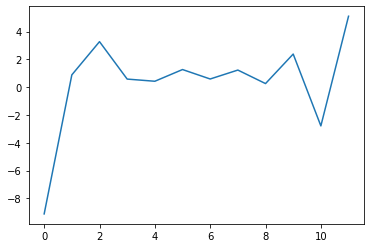

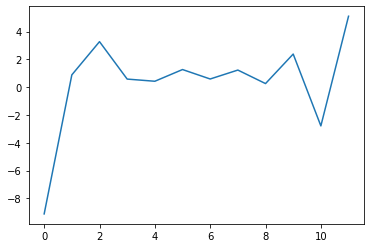

In [24]:
plt.plot(np.arange(len(thetazero)) , thetazero)
plt.show()
plt.plot(np.arange(len(thetaone)) , thetaone) 
plt.show()